In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# You can download from: https://www.kaggle.com/c/titanic/data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

In [31]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              880 non-null    object 
 1   Age                     880 non-null    object 
 2   Gender                  880 non-null    object 
 3   Location                880 non-null    object 
 4   MembershipLevel         880 non-null    object 
 5   TotalPurchases          880 non-null    int64  
 6   TotalSpent              880 non-null    float64
 7   FavoriteCategory        859 non-null    object 
 8   LastPurchaseDate        879 non-null    object 
 9   WebsiteClickRate        880 non-null    float64
 10  TimeSpentOnSite         880 non-null    float64
 11  SocialMediaEngagement   880 non-null    object 
 12  AdClickHistory          808 non-null    object 
 13  GeneratedReview         878 non-null    object 
 14  CustomerSentimentScore  880 

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [32]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_12828\1217612237.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [33]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
import os

# Create directory for model storage if it doesn't exist
os.makedirs('models', exist_ok=True)

# Dictionary to store model results for later evaluation
model_results = {}


In [37]:
# ---- Random Forest ----
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_train_preds = rf_model.predict(X_train_scaled)
rf_test_preds = rf_model.predict(X_test_scaled)
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Store results
model_results['random_forest'] = {
    'train_preds': rf_train_preds,
    'test_preds': rf_test_preds,
    'test_proba': rf_test_proba
}

# Save the model
with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model trained and saved!")


Training Random Forest model...
Random Forest model trained and saved!


c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [38]:
# ---- XGBoost ----
print("Training XGBoost model...")
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_preds = xgb_model.predict(X_train_scaled)
xgb_test_preds = xgb_model.predict(X_test_scaled)
xgb_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Store results
model_results['xgboost'] = {
    'train_preds': xgb_train_preds,
    'test_preds': xgb_test_preds,
    'test_proba': xgb_test_proba
}

# Save the model
with open('models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model trained and saved!")


Training XGBoost model...
XGBoost model trained and saved!


In [39]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

print("Training AdaBoost model...")
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Make predictions
ada_train_preds = ada_model.predict(X_train_scaled)
ada_test_preds = ada_model.predict(X_test_scaled)
ada_test_proba = ada_model.predict_proba(X_test_scaled)[:, 1]

# Store results
model_results['adaboost'] = {
    'train_preds': ada_train_preds,
    'test_preds': ada_test_preds,
    'test_proba': ada_test_proba
}

# Save the model
with open('models/adaboost_model.pkl', 'wb') as f:
    pickle.dump(ada_model, f)

print("AdaBoost model trained and saved!")

Training AdaBoost model...
AdaBoost model trained and saved!


In [40]:
with open('models/model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

In [41]:
# Create a function to evaluate and display results
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model performance with multiple metrics"""
    results = {}
    results['accuracy'] = accuracy_score(y_true, y_pred)
    results['precision'] = precision_score(y_true, y_pred, zero_division=0)
    results['recall'] = recall_score(y_true, y_pred, zero_division=0)
    results['f1'] = f1_score(y_true, y_pred, zero_division=0)
    
    if y_proba is not None:
        results['auc'] = roc_auc_score(y_true, y_proba)
    
    return results

In [42]:
# Update the models list to include the FT Transformer
models = ['random_forest', 'xgboost', 'adaboost']

# Recalculate evaluation results for all models including FT Transformer
evaluation_results = {}

for model in models:
    test_preds = model_results[model]['test_preds']
    test_proba = model_results[model]['test_proba']
    evaluation_results[model] = evaluate_model(y_test, test_preds, test_proba)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(evaluation_results).T
display(results_df.style.highlight_max(axis=0))

,accuracy,precision,recall,f1,auc
random_forest,0.960227,0.937500,0.974026,0.955414,0.677883
xgboost,0.437500,0.437500,1.000000,0.608696,0.526630
adaboost,0.960227,0.937500,0.974026,0.955414,0.991342


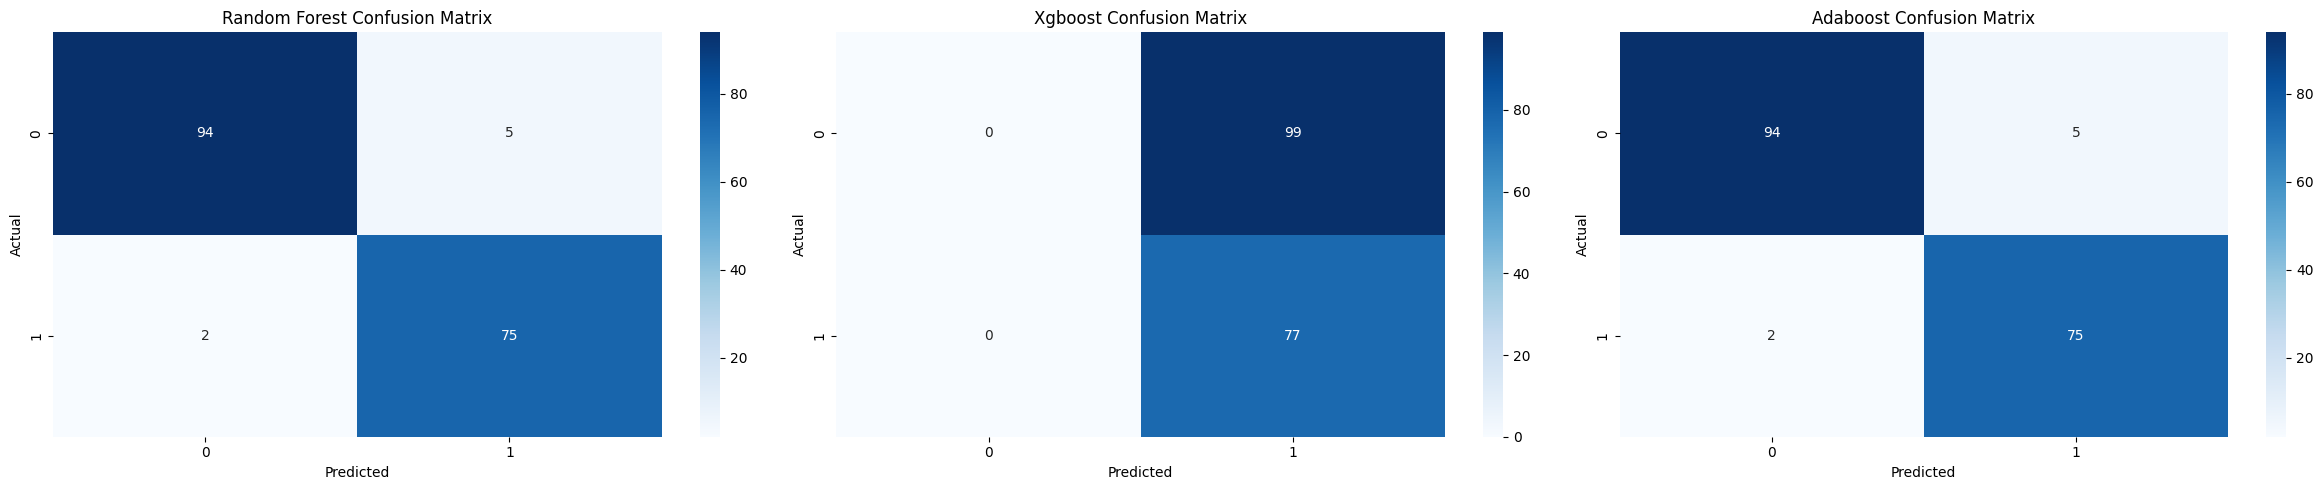

In [43]:
# Redraw confusion matrices with FT Transformer
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model_results[model]['test_preds'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model.replace("_", " ").title()} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../images/ml_confusion_matrices.png', dpi=300)

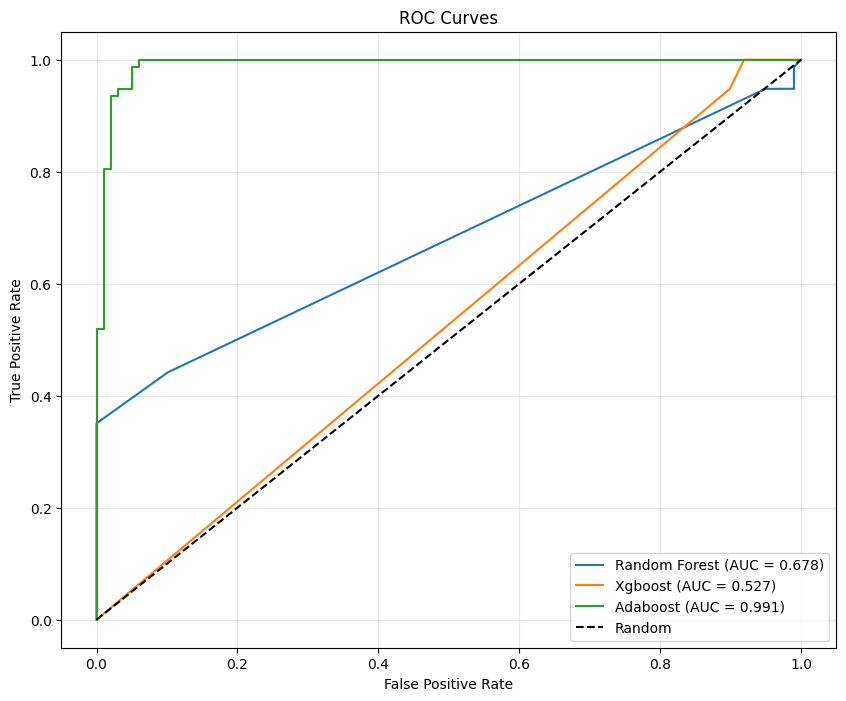

In [44]:
# Redraw ROC curves including FT Transformer
plt.figure(figsize=(10, 8))

for model in models:
    y_proba = model_results[model]['test_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model.replace("_", " ").title()} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../images/ml_roc_curves.png', dpi=300)